<a href="https://colab.research.google.com/github/Vilars/Data-205/blob/main/New_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [56]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [57]:
troubled = pd.read_csv('https://raw.githubusercontent.com/Vilars/Data-205/refs/heads/main/Troubled.csv', index_col=0)
troubled.head(5)

,Community Name,Street Address,City,Zip Code,Case Number,Longitude,Latitude,First Inspection Date,Next Inspection Date,Inspection Frequency,Compliant,Unit Count,Units Inspected,Average Violations Per Unit,Severity Index,No Violations Observed,Infested Units Percentage,Units with Mold,Analysis Rating,Location
License Number,,,,,,,,,,,,,,,,,,,,
62427,The Veridian At Silver Spring Metro,1133 East West Hwy,Silver Spring,20910,178097,-77.027783,38.989347,06/15/2023,NaN,3.0,1,457,110,0.54,0.72,68,0.00,0.0,compliant,"(38.9893, -77.0278)"
17369,"Schrider Street, 8115",8115 Schrider St,Silver Spring,20910,178075,-77.014091,38.991809,04/18/2023,NaN,2.0,1,9,11,3.72,1.67,2,0.27,0.0,troubled,"(38.9918, -77.0141)"
17200,Seneca Ridge,19568 Scenery Dr,Germantown,20876,177536,-77.234887,39.176872,04/13/2023,NaN,3.0,1,71,58,1.62,1.13,26,0.05,0.0,compliant,"(39.1769, -77.2349)"
17632,The Point At Germantown,2 Observation Ct,Germantown,20876,175575,-77.247494,39.192140,03/29/2023,NaN,2.0,1,218,63,0.85,1.11,28,0.03,0.0,compliant,"(39.1921, -77.2475)"
17286,"Kennebec Avenue, 903",903 KENNEBEC AVE,Takoma Park,20912,158817,-76.999427,38.990245,01/23/2020,NaN,2.0,0,1,0,0.00,0.00,0,0.00,0.0,TBD,"(38.9902, -76.9994)"


In [50]:
troubled.describe()

,Case Number,Longitude,Latitude,Next Inspection Date,Inspection Frequency,Compliant,Unit Count,Units Inspected,Average Violations Per Unit,Severity Index,No Violations Observed,Infested Units Percentage,Units with Mold
count,620.000000,620.000000,620.000000,0.0,602.000000,620.000000,620.000000,620.000000,620.000000,620.000000,620.000000,620.000000,620.000000
mean,169510.162903,-71.711345,36.315073,NaN,2.468439,0.709677,103.377419,36.875806,1.226629,0.803484,15.629032,0.019452,0.008758
std,9268.917205,19.593214,9.921991,NaN,0.782398,0.454278,152.891251,85.504220,1.588173,3.976216,26.398422,0.059162,0.038831
min,106412.000000,-81.529192,0.000000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,-96.250000,0.000000,0.000000,0.000000
25%,161023.750000,-77.083482,38.990110,NaN,2.000000,0.000000,4.000000,4.000000,0.250000,0.267500,1.000000,0.000000,0.000000
50%,173290.500000,-77.013500,38.995081,NaN,3.000000,1.000000,19.500000,9.000000,0.850000,1.000000,4.000000,0.000000,0.000000
75%,176703.250000,-76.999471,39.030486,NaN,3.000000,1.000000,152.000000,44.000000,1.687500,1.500000,22.000000,0.000000,0.000000
max,178118.000000,0.000000,39.312144,NaN,3.000000,1.000000,1119.000000,1069.000000,17.000000,4.720000,280.000000,0.660000,0.460000


In [51]:
troubled.isnull().sum()

,0
Community Name,0
Street Address,0
City,0
Zip Code,0
Case Number,0
Longitude,0
Latitude,0
First Inspection Date,0
Next Inspection Date,620
Inspection Frequency,18


In [52]:
troubled['Severity Index'] = troubled['Severity Index'].replace(-96.25, np.nan)

In [53]:
troubled = troubled.dropna()

In [54]:
# fix city name
troubled['City'] = troubled['City'].str.title()

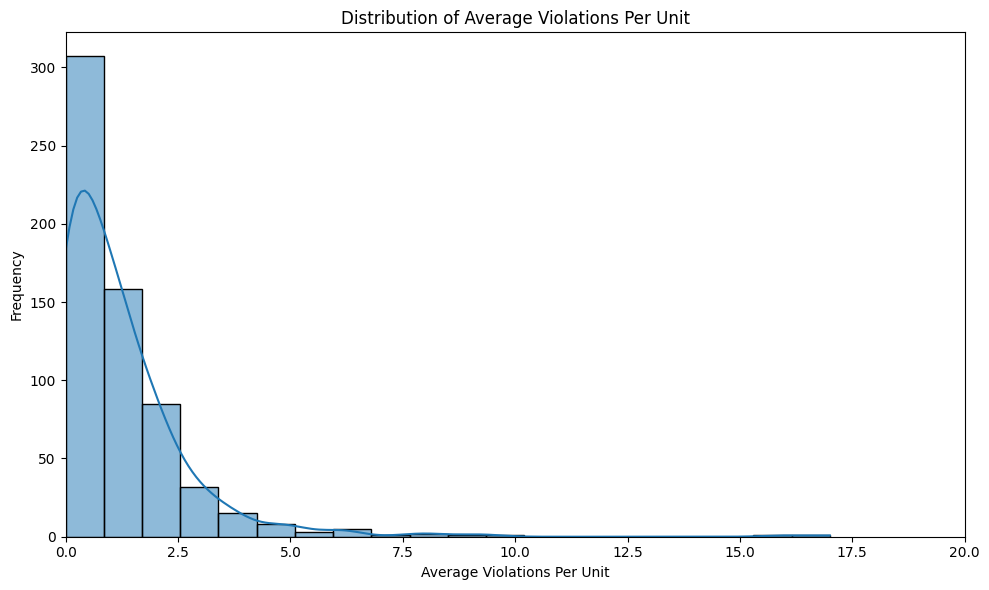

In [58]:
# distribution of average violation per unit
plt.figure(figsize=(10, 6))
sns.histplot(troubled['Average Violations Per Unit'], bins=20, kde=True)
plt.xlabel('Average Violations Per Unit')
plt.ylabel('Frequency')
plt.title('Distribution of Average Violations Per Unit')
plt.xlim(0, 20)
plt.tight_layout()
plt.show()

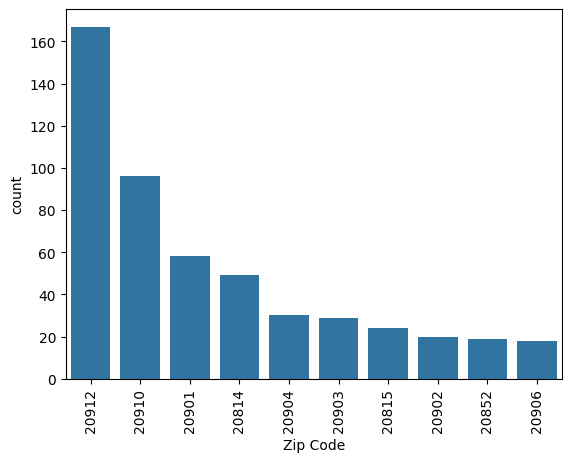

In [60]:
# top 10 Zip
troubled['Zip Code'].value_counts().head(10)

# barplot top 10 zip
sns.countplot(x='Zip Code', data=troubled, order=troubled['Zip Code'].value_counts().head(10).index)
plt.xticks(rotation=90)
plt.show()

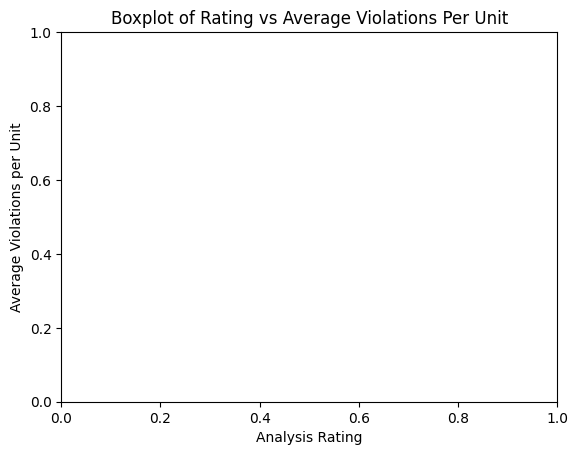

In [18]:
# Boxplot analysis rating vs average violation
sns.boxplot(x='Analysis Rating', y='Average Violations Per Unit', data=troubled)
plt.xlabel('Analysis Rating')
plt.ylabel('Average Violations per Unit')
plt.title('Boxplot of Rating vs Average Violations Per Unit')
plt.show()

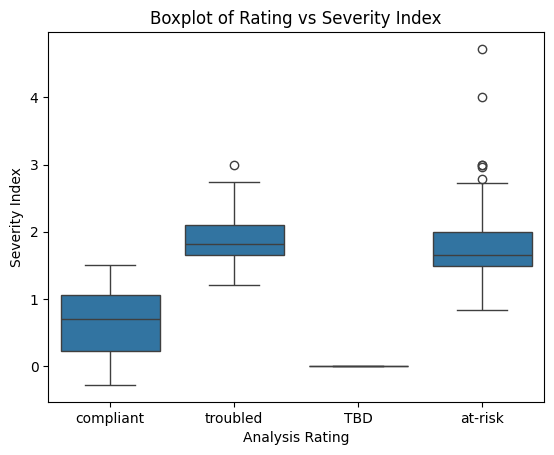

In [37]:
# Boxplot analysis rating vs severity index
sns.boxplot(x='Analysis Rating', y='Severity Index', data=troubled)
plt.xlabel('Analysis Rating')
plt.ylabel('Severity Index')
plt.title('Boxplot of Rating vs Severity Index')
plt.show()

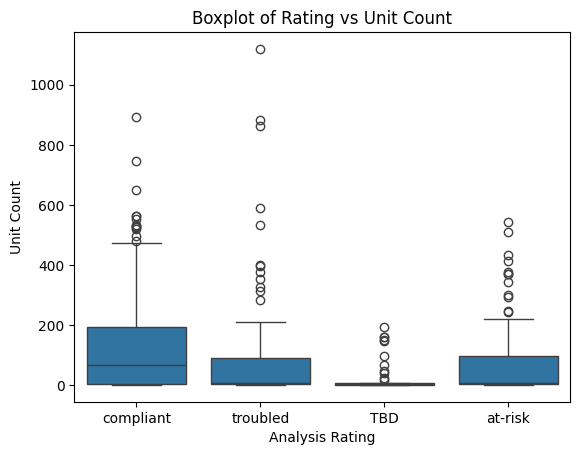

In [36]:
# Boxplot analysis rating vs unit count
sns.boxplot(x='Analysis Rating', y='Unit Count', data=troubled)
plt.xlabel('Analysis Rating')
plt.ylabel('Unit Count')
plt.title('Boxplot of Rating vs Unit Count')
plt.show()

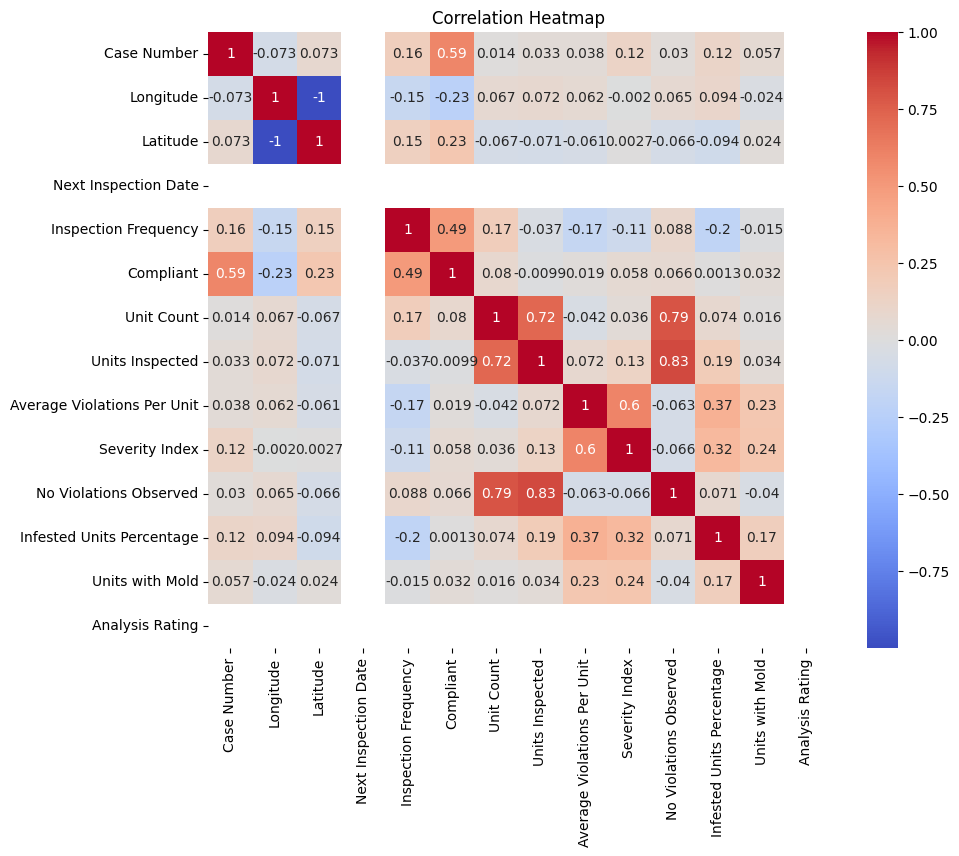

In [50]:
# Heatmap
corr = troubled.select_dtypes(include=np.number).corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [156]:
t_df = troubled[['Longitude', 'Latitude','Analysis Rating', 'Average Violations Per Unit', 'Severity Index', 'Location']]
t_df.head(5)

,Longitude,Latitude,Analysis Rating,Average Violations Per Unit,Severity Index,Location
License Number,,,,,,


In [19]:
crime = pd.read_csv('/content/Crime_20250419.csv',index_col=0)
crime.head()

<ipython-input-19-e4840a0d8dfc>:1: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  crime = pd.read_csv('/content/Crime_20250419.csv',index_col=0)


,Offence Code,CR Number,Dispatch Date / Time,Start_Date_Time,End_Date_Time,NIBRS Code,Victims,Crime Name1,Crime Name2,Crime Name3,...,PRA,Address Number,Street Prefix,Street Name,Street Suffix,Street Type,Latitude,Longitude,Police District Number,Location
Incident ID,,,,,,,,,,,,,,,,,,,,,
201166610,2308,170548599,NaN,12/14/2017 04:30:00 PM,NaN,23D,1,Crime Against Property,Theft from Building,LARCENY - FROM BLDG,...,270,1700.0,E,JEFFERSON,NaN,ST,39.05848,-77.1264,1D,"(39.0585, -77.1264)"
201359823,5404,220000965,01/09/2022 01:18:38 AM,01/09/2022 01:34:00 AM,NaN,90D,1,Crime Against Society,Driving Under the Influence,DRIVING UNDER THE INFLUENCE LIQUOR,...,428,100.0,N,FREDERICK,NaN,AVE,39.09438,-77.1517,6D,"(39.0944, -77.1517)"
201095140,2303,16043118,NaN,08/24/2016 09:47:00 PM,NaN,23C,1,Crime Against Property,Shoplifting,LARCENY - SHOPLIFTING,...,271,5700.0,NaN,BOU,NaN,AVE,39.05597,-77.1136,1D,"(39.056, -77.1136)"
201090710,5707,16037677,NaN,07/25/2016 05:31:00 PM,NaN,90J,1,Crime Against Society,Trespass of Real Property,TRESPASSING,...,321,11100.0,NaN,VEIRS MILL,NaN,RD,39.03758,-77.0519,4D,"(39.0376, -77.0519)"
201362142,2901,220003839,01/28/2022 07:11:29 PM,01/28/2022 02:40:00 PM,01/28/2022 02:46:00 PM,290,1,Crime Against Property,Destruction/Damage/Vandalism of Property,DAMAGE PROPERTY - BUSINESS,...,545,18500.0,N,FREDERICK,NaN,AVE,39.16059,-77.2209,6D,"(39.1606, -77.2209)"


In [20]:
crime.describe()

,CR Number,Victims,Zip Code,Address Number,Latitude,Longitude
count,4.408630e+05,440863.000000,437534.000000,4.054820e+05,440863.000000,440863.000000
mean,1.889147e+08,1.021583,20876.820279,8.369859e+03,37.787952,-74.562098
std,5.991255e+07,0.184036,142.302874,1.625705e+04,6.992315,13.796663
min,1.001107e+07,1.000000,6.000000,0.000000e+00,0.000000,-77.516700
25%,1.800321e+08,1.000000,20853.000000,1.500000e+03,39.019260,-77.197350
50%,2.000341e+08,1.000000,20878.000000,8.100000e+03,39.072000,-77.098700
75%,2.300014e+08,1.000000,20904.000000,1.240000e+04,39.141610,-77.027900
max,2.500575e+08,22.000000,29882.000000,2.090600e+06,39.351240,0.000000


In [21]:
crime.info()

<class 'pandas.core.frame.DataFrame'>
Index: 440863 entries, 201166610 to 201519024
Data columns (total 29 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Offence Code            440863 non-null  object 
 1   CR Number               440863 non-null  int64  
 2   Dispatch Date / Time    377185 non-null  object 
 3   Start_Date_Time         440863 non-null  object 
 4   End_Date_Time           200921 non-null  object 
 5   NIBRS Code              440863 non-null  object 
 6   Victims                 440863 non-null  int64  
 7   Crime Name1             440863 non-null  object 
 8   Crime Name2             440863 non-null  object 
 9   Crime Name3             440863 non-null  object 
 10  Police District Name    439590 non-null  object 
 11  Block Address           405342 non-null  object 
 12  City                    440821 non-null  object 
 13  State                   431365 non-null  object 
 14  Zip Code      

In [22]:
crime.isnull().sum()

,0
Offence Code,0
CR Number,0
Dispatch Date / Time,63678
Start_Date_Time,0
End_Date_Time,239942
NIBRS Code,0
Victims,0
Crime Name1,0
Crime Name2,0
Crime Name3,0


In [23]:
crime = crime.fillna(0)

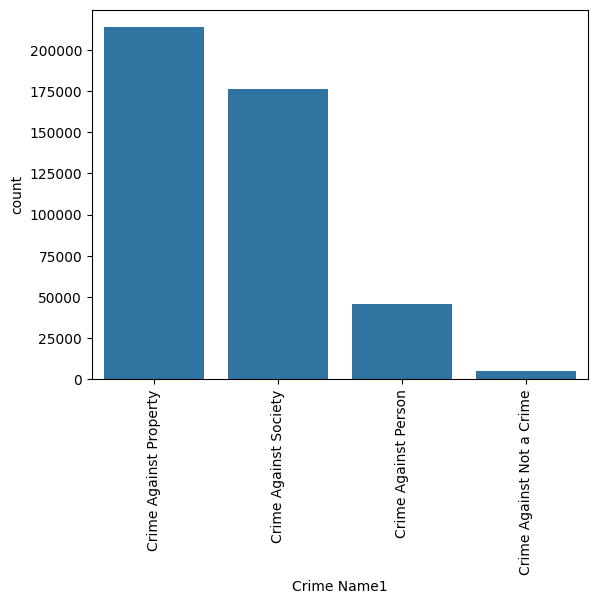

In [24]:
crime['Crime Name1'].value_counts()
sns.countplot(x='Crime Name1', data=crime, order=crime['Crime Name1'].value_counts().index)
plt.xticks(rotation=90)
plt.show()

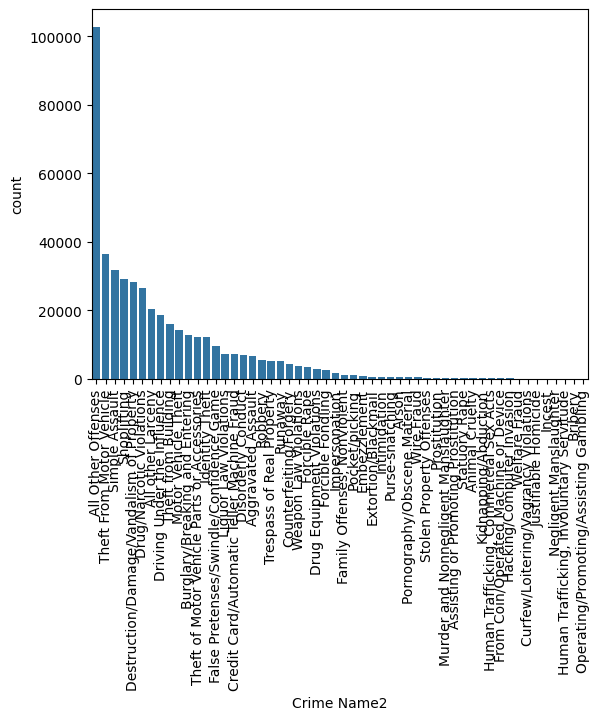

In [25]:
crime['Crime Name2'].value_counts()
sns.countplot(x='Crime Name2', data=crime, order=crime['Crime Name2'].value_counts().index)
plt.xticks(rotation=90)
plt.show()

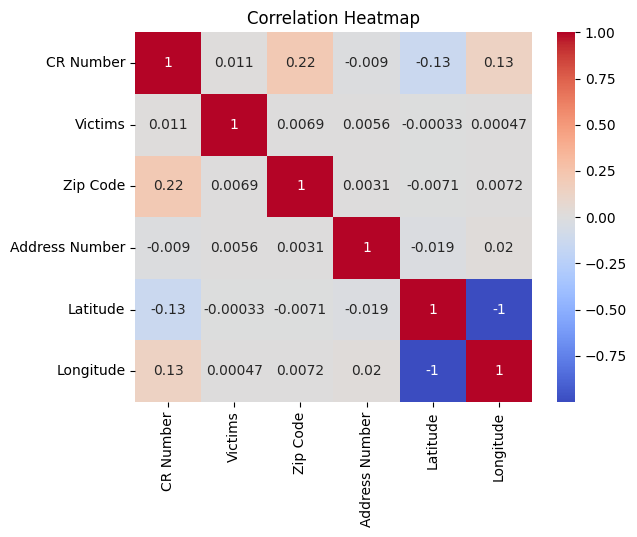

In [9]:
# correlation analysis
corr = crime.select_dtypes(include=np.number).corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [26]:
c_df = crime[['Longitude', 'Latitude','Crime Name1', 'Crime Name2', 'Crime Name3', 'Location']]
c_df.head(5)

,Longitude,Latitude,Crime Name1,Crime Name2,Crime Name3,Location
Incident ID,,,,,,
201166610,-77.1264,39.05848,Crime Against Property,Theft from Building,LARCENY - FROM BLDG,"(39.0585, -77.1264)"
201359823,-77.1517,39.09438,Crime Against Society,Driving Under the Influence,DRIVING UNDER THE INFLUENCE LIQUOR,"(39.0944, -77.1517)"
201095140,-77.1136,39.05597,Crime Against Property,Shoplifting,LARCENY - SHOPLIFTING,"(39.056, -77.1136)"
201090710,-77.0519,39.03758,Crime Against Society,Trespass of Real Property,TRESPASSING,"(39.0376, -77.0519)"
201362142,-77.2209,39.16059,Crime Against Property,Destruction/Damage/Vandalism of Property,DAMAGE PROPERTY - BUSINESS,"(39.1606, -77.2209)"


In [27]:
# top 10 crime
crime['Crime Name2'].value_counts().head(10)

,count
Crime Name2,
All Other Offenses,102760
Theft From Motor Vehicle,36543
Simple Assault,31792
Shoplifting,29044
Destruction/Damage/Vandalism of Property,28198
Drug/Narcotic Violations,26556
All other Larceny,20293
Driving Under the Influence,18680
Theft from Building,15875


In [39]:
# subset dataset with crime name and Zip code
crime_df = crime[['Crime Name2', 'Zip Code']]
crime_df.head(5)

,Crime Name2,Zip Code
Incident ID,,
201166610,Theft from Building,20852.0
201359823,Driving Under the Influence,20877.0
201095140,Shoplifting,20852.0
201090710,Trespass of Real Property,20902.0
201362142,Destruction/Damage/Vandalism of Property,20879.0


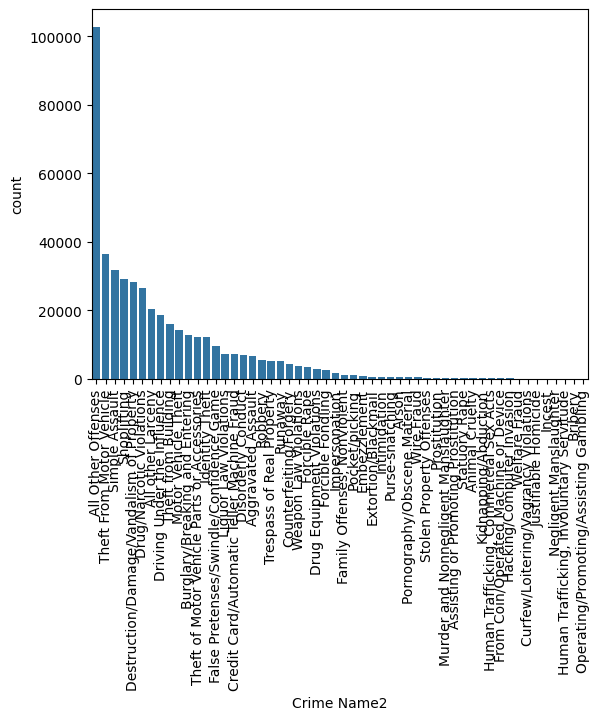

In [43]:
# histogram crime name
sns.countplot(x='Crime Name2', data=crime_df, order=crime_df['Crime Name2'].value_counts().index)
plt.xticks(rotation=90)
plt.show()

ValueError: cannot reindex on an axis with duplicate labels

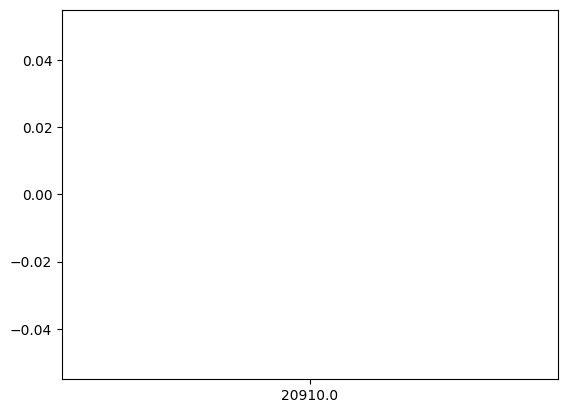

In [62]:
# top 10 Zip
crime_df['Zip Code'].value_counts().head(10)

# barplot top 10 zip
sns.countplot(x='Zip Code', data=crime_df, order=crime_df['Zip Code'].value_counts().head(10).index)
plt.xticks(rotation=90)
plt.show()